## Dataset

In [1]:
! pip -q install pytorch-lightning
! pip -q install torchviz
! pip -q install graphviz

In [2]:
import torch as th
from torch.utils.data import Dataset, DataLoader

class UnknownFunctionDataset(Dataset):
    def __init__(self, data: list, labels: list):
        self.data = [th.tensor(sample).float() for sample in data]
        self.labels = [th.tensor(label).float() for label in labels]
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [3]:
train_data = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 1], [1, 1, 0]]
train_labels = [0, 0, 0, 0, 1, 1, 1, 1]

test_data = [[0, 1, 1], [1, 1, 1]]
test_labels = [0, 1]

train_dataset = UnknownFunctionDataset(train_data, train_labels)
test_dataset = UnknownFunctionDataset(test_data, test_labels)

In [4]:
for i in range(len(train_dataset)):
    sample = train_dataset[i]

    print(sample)
    
    if i == 2:
        break

(tensor([0., 0., 0.]), tensor(0.))
(tensor([0., 0., 1.]), tensor(0.))
(tensor([0., 1., 0.]), tensor(0.))


In [5]:
# we are not batching
# we are not shuffling
# we are not doing multiprocessor work at all

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=1)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True, num_workers=1)

## Writing Modules

In [9]:
class UnknownFunctionModel(th.nn.Module):
    def __init__(self, input_dim=3, output_dim=1):
        super(UnknownFunctionModel, self).__init__()
        self.lin1 = th.nn.Linear(input_dim, 10)
        self.sigmoid = th.nn.Sigmoid()
        self.lin2 = th.nn.Linear(10, output_dim)
    
    def forward(self, x):
        pass
#         x = self.lin1(x)
#         x = self.sigmoid(x)
#         x = self.lin2(x)
#         return self.sigmoid(x)

optimizer = th.optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
loss_func = th.nn.MSELoss()
epochs = 100
device = "cuda" if th.cuda.is_available() else "cpu"
model = UnknownFunctionModel().to(device)

#train loop
for epoch in range(epochs):
    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        data, label = batch
        
        data = data.to(device)
        label = label.to(device)
        
        output = model(data)
        loss = loss_func(output, label)
        loss.backward()
        optimizer.step()
    
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch} results:")
        for batch_idx, batch in enumerate(test_dataloader):
                data, label = batch
                data = data.to(device)
                label = label.to(device)
                output = model(data).item()
                print(f"Result: {round(output)}, Target: {label}")
        

Epoch 0 results:
Result: 1, Target: tensor([0.], device='cuda:0')
Result: 1, Target: tensor([1.], device='cuda:0')
Epoch 10 results:
Result: 1, Target: tensor([1.], device='cuda:0')
Result: 1, Target: tensor([0.], device='cuda:0')
Epoch 20 results:
Result: 1, Target: tensor([1.], device='cuda:0')
Result: 1, Target: tensor([0.], device='cuda:0')
Epoch 30 results:
Result: 1, Target: tensor([0.], device='cuda:0')
Result: 1, Target: tensor([1.], device='cuda:0')
Epoch 40 results:
Result: 1, Target: tensor([1.], device='cuda:0')
Result: 1, Target: tensor([0.], device='cuda:0')
Epoch 50 results:
Result: 1, Target: tensor([1.], device='cuda:0')
Result: 1, Target: tensor([0.], device='cuda:0')
Epoch 60 results:
Result: 1, Target: tensor([0.], device='cuda:0')
Result: 1, Target: tensor([1.], device='cuda:0')
Epoch 70 results:
Result: 1, Target: tensor([1.], device='cuda:0')
Result: 1, Target: tensor([0.], device='cuda:0')
Epoch 80 results:
Result: 1, Target: tensor([0.], device='cuda:0')
Result

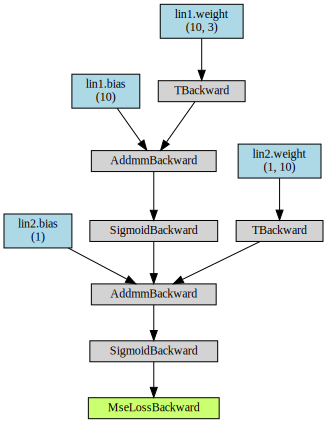

In [10]:
from torchviz import make_dot

make_dot(loss, params=dict(model.named_parameters()))

## Tensorboard

In [46]:
# this can be run only on a local jupyter notebook, as it's opening it's own port.

# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

In [14]:
class UnknownFunctionModel(th.nn.Module):
    def __init__(self, input_dim=3, output_dim=1):
        super(UnknownFunctionModel, self).__init__()
        self.lin1 = th.nn.Linear(input_dim, 10)
        self.sigmoid = th.nn.Sigmoid()
        self.lin2 = th.nn.Linear(10, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = self.sigmoid(x)
        x = self.lin2(x)
        return self.sigmoid(x)

model = UnknownFunctionModel()
optimizer = th.optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
loss_func = th.nn.MSELoss()
epochs = 100

#train loop
for epoch in range(epochs):
    batch_loss = 0
    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        data, label = batch
        output = model(data)
        loss = loss_func(output, label)
        loss.backward()
        optimizer.step()
        batch_loss += loss.item()
    
    if epoch % 5 == 0:
        writer.add_scalar("train_loss", batch_loss, epoch)
        
        test_loss = 0
        for batch_idx, batch in enumerate(test_dataloader):
            data, label = batch
            output = model(data)
            loss = loss_func(output, label)
            test_loss += loss
        writer.add_scalar("test_loss", test_loss, epoch)


## TorchLightning

In [49]:
from pytorch_lightning import LightningModule, Trainer

class CleanModel(LightningModule):
    def __init__(self, input_dim=3, output_dim=1):
        super(CleanModel, self).__init__()
        self.lin1 = th.nn.Linear(input_dim, 50)
        self.sigmoid = th.nn.Sigmoid()
        self.lin2 = th.nn.Linear(50, output_dim)
        
        self.lr = 0.02
        self.momentum = 0.9
        self.loss_function = th.nn.MSELoss()

    def forward(self, x):
        x = self.lin1(x)
        x = self.sigmoid(x)
        x = self.lin2(x)
        return self.sigmoid(x)

    def configure_optimizers(self):
        return optim.SGD(self.parameters(), lr=self.lr, momentum=self.momentum)

    def train_dataloader(self):
        loader = DataLoader(UnknownFunctionDataset(train_data, train_labels), batch_size=1, shuffle=True)
        return loader

    def val_dataloader(self):
        loader = DataLoader(UnknownFunctionDataset(test_data, test_labels), batch_size=1, shuffle=False)
        return loader

    def training_step(self, batch, batch_nb):
        x, y = batch
        loss = self.loss_function(self(x), y)
        return {'loss': loss}

    def validation_step(self, batch, batch_nb):
        x, y = batch
        x = x
        y = y
        loss = self.loss_function(self(x), y)
        return {'val_loss': loss}
    
    def training_epoch_end(self, outputs):
        train_loss_mean = sum([o["loss"] for o in outputs]) / len(outputs)
        self.log("train_loss_mean", train_loss_mean)
        
    def validation_epoch_end(self, outputs):
        val_loss_mean = sum([o['val_loss'] for o in outputs]) / len(outputs)
        self.log("val_loss_mean", val_loss_mean)


In [50]:
model = CleanModel()

trainer = Trainer(
    max_epochs=100,
    min_epochs=1,
    auto_lr_find=False,
    auto_scale_batch_size=False,
    progress_bar_refresh_rate=0)

trainer.fit(model)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores

  | Name          | Type    | Params
------------------------------------------
0 | lin1          | Linear  | 200   
1 | sigmoid       | Sigmoid | 0     
2 | lin2          | Linear  | 51    
3 | loss_function | MSELoss | 0     


1